##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week4/train.csv')
train_df

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [ ]:
# id 제외
train_df = train_df.drop("id", axis = 1)
train_df

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...
366,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,0.294943,0.771286,0.583503,0.300618,clear,Ghost


#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder() # 라벨 인코더 객체 생성
encoder.fit(train_df['color'])
train_df['color'] = encoder.transform(train_df['color']) # label-encoding을 시킨 결과를 다시 df의 컬럼에 저장
train_df['color'].value_counts()

5    137
3    120
4     42
0     41
2     19
1     12
Name: color, dtype: int64

In [ ]:
encoder.fit(train_df['type'])
train_df['type'] = encoder.transform(train_df['type']) # label-encoding을 시킨 결과를 다시 df의 컬럼에 저장
train_df['type'].value_counts()

1    129
2    125
0    117
Name: type, dtype: int64

#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

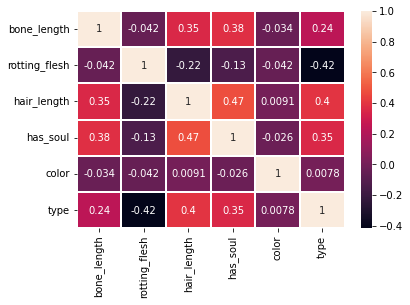

<Figure size 648x648 with 0 Axes>

In [ ]:
import seaborn as sns

sns.heatmap(train_df.corr(),annot = True,linewidths = 1)
plt.figure(figsize=(9,9))
plt.show()

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,:5],train_df.iloc[:,5],test_size = 0.2,random_state = 12)

In [ ]:
X_train

,bone_length,rotting_flesh,hair_length,has_soul,color
292,0.476892,0.478592,0.403630,0.544587,2
236,0.451085,0.464508,0.505819,0.509010,0
222,0.250293,0.408878,0.456618,0.466024,5
206,0.357145,0.489931,0.698190,0.753687,3
41,0.456935,0.627141,0.463794,0.436216,0
...,...,...,...,...,...
130,0.434998,0.412613,0.753331,0.612577,4
241,0.482716,0.561481,0.531423,0.560659,3
253,0.427218,0.545423,0.639650,0.604801,3
155,0.559825,0.649088,0.759295,0.656943,5


In [ ]:
y_train

292    1
236    2
222    2
206    1
41     0
      ..
130    1
241    1
253    2
155    1
331    0
Name: type, Length: 296, dtype: int64

In [ ]:
X_test

,bone_length,rotting_flesh,hair_length,has_soul,color
357,0.434891,0.667160,0.798618,0.460061,4
139,0.416152,0.418087,0.802077,0.454922,3
310,0.387011,0.527047,0.765752,0.610298,5
320,0.342585,0.261752,0.582865,0.510331,3
201,0.296605,0.352157,0.901810,0.541123,4
...,...,...,...,...,...
276,0.246415,0.409596,0.538642,0.084829,4
361,0.501022,0.584847,0.656230,0.469886,3
284,0.761355,0.331480,0.861060,0.735897,4
101,0.207874,0.545294,0.357987,0.484055,3


In [ ]:
y_test

357    1
139    1
310    1
320    2
201    1
      ..
276    0
361    1
284    1
101    0
176    1
Name: type, Length: 75, dtype: int64

#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
gb_clf = GradientBoostingClassifier(random_state = 0, n_estimators = 50,learning_rate = 0.5)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.7067


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50, 100, 500],
    'learning_rate' : [0.005, 0.1, 0.5,1,10]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params , cv = 2 ,verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# 정확도가 위에 비해서 조금 향상되었다.

Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.005, 'n_estimators': 500}
최고 예측 정확도: 0.7095


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [ ]:
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_accuracy = accuracy_score(y_test,w_preds)
print('XGB 정확도: {0:.4f}'.format(w_accuracy))

XGB 정확도: 0.6800


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss", 
                 eval_set = evals)
preds = lgbm_wrapper.predict(X_test)
lgbm_accuracy = accuracy_score(y_test,preds)
print('LightGBM 정확도: {0:.4f}'.format(lgbm_accuracy))

[1]	valid_0's multi_logloss: 1.06078	valid_0's multi_logloss: 1.06078
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.01605	valid_0's multi_logloss: 1.01605
[3]	valid_0's multi_logloss: 0.98745	valid_0's multi_logloss: 0.98745
[4]	valid_0's multi_logloss: 0.961302	valid_0's multi_logloss: 0.961302
[5]	valid_0's multi_logloss: 0.935948	valid_0's multi_logloss: 0.935948
[6]	valid_0's multi_logloss: 0.905585	valid_0's multi_logloss: 0.905585
[7]	valid_0's multi_logloss: 0.881196	valid_0's multi_logloss: 0.881196
[8]	valid_0's multi_logloss: 0.860414	valid_0's multi_logloss: 0.860414
[9]	valid_0's multi_logloss: 0.839374	valid_0's multi_logloss: 0.839374
[10]	valid_0's multi_logloss: 0.825518	valid_0's multi_logloss: 0.825518
[11]	valid_0's multi_logloss: 0.813205	valid_0's multi_logloss: 0.813205
[12]	valid_0's multi_logloss: 0.807044	valid_0's multi_logloss: 0.807044
[13]	valid_0's multi_logloss: 0.80155	valid_0's multi_logloss: 0.80155
[14]	

## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [ ]:
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):

  kfold = KFold(n_splits=n_folds)
  train_fold_pred = np.zeros((X_train.shape[0], 1))
  test_pred = np.zeros((X_test.shape[0], n_folds))

  for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
    X_tr = X_train.loc[train_idx]
    y_tr = y_train.loc[train_idx]
    X_val = X_train.loc[valid_idx]

    model.fit(X_tr, y_tr)
    train_fold_pred[valid_idx, :] = model.predict(X_val).reshape(-1, 1)
    test_pred[:, fold] = model.predict(X_test)

  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
  
  return train_fold_pred, test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

import lightgbm
from lightgbm import LGBMClassifier

from sklearn.linear_model import LogisticRegression

In [ ]:
# 개별 ML 모델을 위한 Classifier 생성
knn_clf  = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)
lgbm_clf = LGBMClassifier(n_estimators = 400)

lr_meta = LogisticRegression(C = 10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [ ]:
# 데이터의 인덱스 번호를 재설정
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [ ]:
# 개별 base 모델별로 함수 실행
knn_train, knn_test = get_stacking_dataset(knn_clf, X_train, y_train, X_test, n_folds= 6)
rf_train, rf_test = get_stacking_dataset(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_dataset(dt_clf, X_train, y_train, X_test,  6)    
ada_train, ada_test = get_stacking_dataset(ada_clf, X_train, y_train, X_test, 6)
lgbm_train, lgbm_test = get_stacking_dataset(lgbm_clf, X_train, y_train, X_test, 6)

In [ ]:
stacked_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train, lgbm_train), axis = 1)
stacked_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test), axis = 1)

print('Original train / test : ', X_train.shape, ' / ', X_test.shape)
print('Stacking train / test : ', stacked_X_train.shape, ' / ', stacked_X_test.shape)

Original train / test :  (296, 5)  /  (75, 5)
Stacking train / test :  (296, 5)  /  (75, 5)


최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [ ]:
lr_meta.fit(stacked_X_train, y_train)
pred = lr_meta.predict(stacked_X_test)
accuracy = accuracy_score(y_test, pred)
print('정확도 : {0:.4f}'.format(accuracy))

정확도 : 0.6267


### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [ ]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Euron 3기_DS/data/Week4/mushrooms.csv')
mushroom_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


mushroom_df feature들의 data type을 확인하시오.

In [ ]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [ ]:
X_mushroom = mushroom_df.drop(['class'],axis=1,inplace = False)
y_mushroom = mushroom_df['class']

X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:
# 범주형 변수들이 무엇인지 알려주기
cat_cols = X_train.columns[X_train.dtypes == 'object'].to_list()
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [ ]:
from catboost import Pool

train_pool = Pool(data = X_train, label = y_train,cat_features = cat_cols)
test_pool = Pool(data = X_test, label = y_test,cat_features = cat_cols)

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations = 400, learning_rate = 0.1, max_depth = 3)
cb_clf.fit(train_pool)
pred = cb_clf.predict(test_pool)
accuracy = accuracy_score(y_test, pred)
print('정확도 : ', accuracy)

0:	learn: 0.4792258	total: 60.5ms	remaining: 24.1s
1:	learn: 0.3415412	total: 71.9ms	remaining: 14.3s
2:	learn: 0.2365699	total: 83.6ms	remaining: 11.1s
3:	learn: 0.1802260	total: 95.3ms	remaining: 9.43s
4:	learn: 0.1331899	total: 106ms	remaining: 8.41s
5:	learn: 0.0899520	total: 122ms	remaining: 7.99s
6:	learn: 0.0605313	total: 131ms	remaining: 7.37s
7:	learn: 0.0498428	total: 141ms	remaining: 6.91s
8:	learn: 0.0421503	total: 150ms	remaining: 6.53s
9:	learn: 0.0332905	total: 162ms	remaining: 6.32s
10:	learn: 0.0298493	total: 174ms	remaining: 6.14s
11:	learn: 0.0265835	total: 185ms	remaining: 6s
12:	learn: 0.0247474	total: 198ms	remaining: 5.9s
13:	learn: 0.0226768	total: 211ms	remaining: 5.82s
14:	learn: 0.0211241	total: 224ms	remaining: 5.76s
15:	learn: 0.0201853	total: 234ms	remaining: 5.62s
16:	learn: 0.0189982	total: 245ms	remaining: 5.51s
17:	learn: 0.0183917	total: 254ms	remaining: 5.4s
18:	learn: 0.0173587	total: 269ms	remaining: 5.39s
19:	learn: 0.0158801	total: 281ms	remainin

수고하셨습니다!